In [12]:
import pandas as pd
import numpy as np
import pickle 
import joblib
import matplotlib.pyplot as plt
import csv
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [24]:
# read the data and given the name "label" and "content"
df = pd.read_csv('data/shuffled-full-set-hashed.csv',  names=['labels', 'content'])

In [25]:
df.head()

,labels,content
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...


In [26]:
# There are total numer of 62203 (excluding the header) 
df.shape

(62204, 2)

In [27]:
# check missing data - no labels data missing, 45 documents data missing
df.isnull().sum()

labels      0
content    45
dtype: int64

In [28]:
df.head()

,labels,content
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...


### Split dataset into train and test

In [29]:
train_labels, test_labels, train_data, test_data = train_test_split(df['labels'], df['content'],
                                                                    test_size = 0.20, random_state=0)
print('Number of train data:', len(train_data))
print('Number of test data:', len(test_data))

Number of train data: 49763
Number of test data: 12441


### Data visualization on train and test data

Text(0.5, 1.0, 'Train data label count')

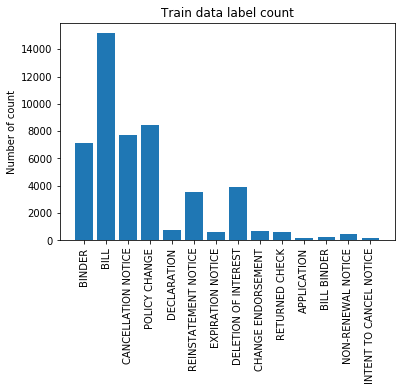

In [30]:
train_data_label_count = Counter(train_labels)
plt.bar(np.arange(len(train_data_label_count)), train_data_label_count.values())
plt.xticks(np.arange(len(train_data_label_count)),train_data_label_count.keys(),rotation = 90)
plt.ylabel('Number of count')
plt.title('Train data label count')

Text(0.5, 1.0, 'Test data label count')

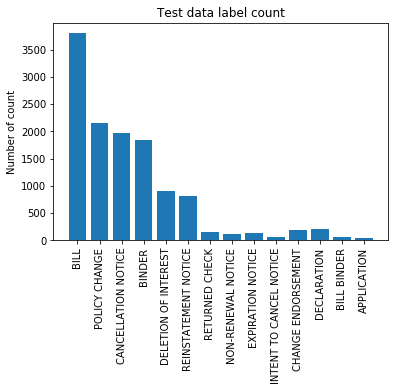

In [31]:
test_data_label_count = Counter(test_labels)
plt.bar(np.arange(len(test_data_label_count)), test_data_label_count.values())
plt.xticks(np.arange(len(test_data_label_count)),test_data_label_count.keys(),rotation = 90)
plt.ylabel('Number of count')
plt.title('Test data label count')